# Multiple Linear Regression with New York Housing Market

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv')
df.head(25)

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
5,10817,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0,Central Harlem,Manhattan
6,9077,1995,0.0,0,600,6,1.0,115,0,0,0,0,0,0,0,0,Midtown East,Manhattan
7,5150,2995,0.0,1,579,6,21.0,33,0,0,0,0,0,0,0,0,Battery Park City,Manhattan
8,9507,15000,2.0,2,1715,0,30.0,2,0,0,0,0,0,0,0,0,Flatiron,Manhattan
9,1437,4650,1.0,1,915,5,5.0,106,0,0,0,0,0,0,0,0,Upper East Side,Manhattan


In [9]:
x = df[['bedrooms','bathrooms', 'size_sqft' , 'min_to_subway', 'floor', 'building_age_yrs','no_fee', 'has_roofdeck', 'has_washer_dryer' ,'has_doorman', 'has_elevator' , 'has_dishwasher', 'has_patio', 'has_gym']] 

y = df[['rent']] 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)  

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


Creating predictive algortihm 

In [21]:
MLR = LinearRegression()
MLR.fit(x_train, y_train)
y_predict = MLR.predict(x_test)
#fins the coefficients and the intercept value 

Predicting rent for my apartment based on the required features 

In [22]:
olus_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

In [26]:
predict = MLR.predict(olus_apartment)
print( 'My predicted rent is: $%.2f' % predict)

My predicted rent is: $2393.58


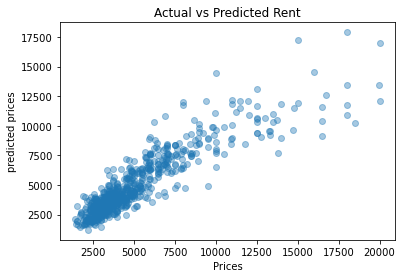

In [31]:
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.xlabel('Prices')
plt.ylabel('predicted prices')
plt.title('Actual vs Predicted Rent')
plt.show()

In [33]:
print(MLR.coef_)

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


Investigating correlations 

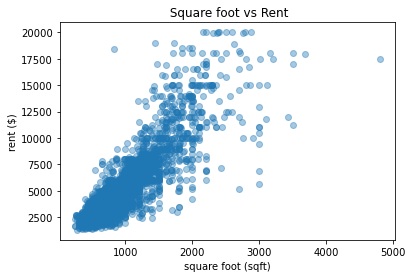

In [40]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha = 0.4)
plt.xlabel('square foot (sqft)')
plt.ylabel('rent ($)')
plt.title(' Square foot vs Rent')
plt.show()


# positive correlation between square ft and rent prices

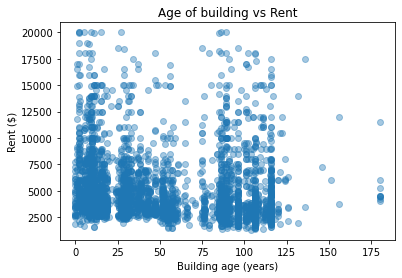

In [45]:
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha = 0.4)
plt.xlabel('Building age (years)')
plt.ylabel('Rent ($)')
plt.title('Age of building vs Rent')
plt.show()

# is there a correlation between building age and rent prices in New York? 

Evaluating model accuracy 

In [48]:
# mean squarred error regression loss for training set
print("Train score:")
print(MLR.score(x_train, y_train))

Train score:
0.7725460559817883


In [47]:
# mean squared error regression loss for testing set
print("Test score:")
print(MLR.score(x_test, y_test))

Test score:
0.805037197535764
